In [1]:
import pandas as pd
import numpy as np
import os
from sklearn import svm
from sklearn.metrics import hamming_loss
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics
from scipy.spatial.distance import hamming

In [2]:
import weka.core.jvm as jvm
import weka.core.packages as packages

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines

(a) import data

In [3]:
os.chdir('../data/Anuran Calls (MFCCs)/')

In [58]:
df = pd.read_csv('Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [59]:
train = df.sample(frac=0.7)
test = df[~df.index.isin(train.index)]
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
test

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.148539,-0.096910,0.257523,0.260881,0.312603,0.134134,-0.216262,-0.189334,0.261960,...,-0.034082,-0.120716,-0.100800,-0.001992,0.111462,0.103637,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.137623,-0.085808,0.322446,0.344695,0.285642,0.056517,-0.314418,-0.252324,0.288897,...,-0.058694,-0.072913,-0.064263,0.022455,0.130752,0.074132,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,1.0,-0.515567,-0.219812,0.118473,0.106919,0.471155,0.121196,-0.136494,0.027486,0.106110,...,0.049024,0.109761,0.043604,0.047369,-0.018168,-0.085380,Hylidae,Scinax,ScinaxRuber,60
2155,1.0,-0.578837,-0.331501,0.105921,0.089931,0.456617,0.079131,-0.133406,0.056485,0.093265,...,0.079075,0.125759,0.044132,0.017652,-0.077831,-0.132563,Hylidae,Scinax,ScinaxRuber,60
2156,1.0,-0.547168,-0.266780,0.056115,0.048947,0.423631,0.081924,-0.184252,0.024682,0.111803,...,0.049831,0.115522,0.051333,0.019697,-0.061764,-0.078648,Hylidae,Scinax,ScinaxRuber,60
2157,1.0,-0.512794,0.056322,0.259677,0.030140,0.369783,-0.117154,-0.189292,0.248948,0.193566,...,0.096589,0.255261,0.047039,-0.016643,-0.046598,-0.055862,Hylidae,Scinax,ScinaxRuber,60


(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

In [61]:
y_train_family = train[['Family']]
y_train_genus = train[['Genus']]
y_train_species = train[['Species']]
x_train = train.drop(['Family','Genus','Species','RecordID'], axis=1)
y_test_family = test[['Family']]
y_test_genus = test[['Genus']]
y_test_species = test[['Species']]
x_test = test.drop(['Family','Genus','Species','RecordID'], axis=1)

In [62]:
y_test_family

,Family
0,Leptodactylidae
1,Leptodactylidae
2,Leptodactylidae
3,Leptodactylidae
4,Leptodactylidae
...,...
2154,Hylidae
2155,Hylidae
2156,Hylidae
2157,Hylidae


(b) i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

In [18]:
sv = svm.SVC(gamma='auto')
fa_model = sv.fit(x_train, y_train_family)
y_pred_fa = fa_model.predict(x_test)
loss = hamming_loss(y_test_family, y_pred_fa)
print('family hamming loss is %0.8f' %loss)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


family hamming loss is 0.06762390


In [19]:
sv = svm.SVC(gamma='auto')
fa_model = sv.fit(x_train, y_train_genus)
y_pred_ge = fa_model.predict(x_test)
loss = hamming_loss(y_test_genus, y_pred_ge)
print('genus hamming loss is %0.8f' %loss)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


genus hamming loss is 0.09819361


In [36]:
sv = svm.SVC(gamma='auto')
fa_model = sv.fit(x_train, y_train_species)
y_pred_sp = fa_model.predict(x_test)
loss = hamming_loss(y_test_species, y_pred_sp)
print('species hamming loss is %0.8f' %loss)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


species hamming loss is 0.08290875


In [41]:
equal_num = 0
y_comp = pd.DataFrame(y_pred_fa, columns=y_train_family.columns)
for a in range(0, len(y_comp), 1):
    if y_comp.values[a][0] == y_train_family.values[a][0]:
        equal_num += 1
percent = equal_num / len(y_comp)
print('Family exact match is: %0.8f' %percent)

Family exact match is: 0.46919870


In [42]:
equal_num = 0
y_comp = pd.DataFrame(y_pred_ge, columns=y_train_genus.columns)
for a in range(0, len(y_comp), 1):
    if y_comp.values[a][0] == y_train_genus.values[a][0]:
        equal_num += 1
percent = equal_num / len(y_comp)
print('Genus exact match is: %0.8f' %percent)

Genus exact match is: 0.41963872


In [43]:
equal_num = 0
y_comp = pd.DataFrame(y_pred_sp, columns=y_train_species.columns)
for a in range(0, len(y_comp), 1):
    if y_comp.values[a][0] == y_train_species.values[a][0]:
        equal_num += 1
percent = equal_num / len(y_comp)
print('Species exact match is: %0.8f' %percent)

Species exact match is: 0.28068550


(b) ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [112]:
lambda_range = np.logspace(-3, 6, 10)
c_range = np.arange(0.1, 2, 0.1)
param_grid = dict(gamma=lambda_range, C=c_range)
print(param_grid)
cv_1 = StratifiedShuffleSplit(n_splits=10, test_size = 0.25, random_state=38)
grid_1 = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv_1)
cv_2 = StratifiedShuffleSplit(n_splits=10, test_size = 0.25, random_state=38)
grid_2 = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv_2)
cv_3 = StratifiedShuffleSplit(n_splits=10, test_size = 0.25, random_state=38)
grid_3 = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv_3)

{'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06]), 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])}


In [110]:
grid_1.fit(x_train, y_train_family)
grid_1.best_score_

0.9861000794281176

In [111]:
print(grid_1.best_params_)

{'gamma': 10.0}


In [102]:
grid_2.fit(x_train, y_train_genus)
grid_2.best_score_

0.9819698173153297

In [103]:
print(grid_2.best_params_)

{'gamma': 1.0}


In [104]:
grid_3.fit(x_train, y_train_species)
grid_3.best_score_

0.9836378077839555

In [105]:
print(grid_3.best_params_)

{'gamma': 1.0}


iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [86]:
c_range = np.arange(0.1, 2, 0.1)
param_grid = dict(C=c_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.25, random_state=38)
grid_one = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), param_grid=param_grid, cv=cv)
grid_two = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), param_grid=param_grid, cv=cv)
grid_three = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), param_grid=param_grid, cv=cv)

In [87]:
grid_one.fit(x_train, y_train_family)

grid_one.best_score_

0.9374900714853057

In [88]:
print(grid_one.best_params_)

{'C': 1.9000000000000001}


In [89]:
grid_two.fit(x_train, y_train_genus)
grid_two.best_params_
grid_two.best_score_

0.9469420174741858

In [90]:
print(grid_two.best_params_)

{'C': 1.9000000000000001}


In [91]:
grid_three.fit(x_train, y_train_species)
grid_three.best_params_
grid_three.best_score_

0.9563939634630658

In [92]:
print(grid_three.best_params_)

{'C': 1.8000000000000003}


iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [87]:
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/rhino-1.7R4.jar', '/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/runnablequeue.jar', '/opt/anaconda3/lib/python3.8/site-packages/javabridge/jars/cpython.jar', '/opt/anaconda3/lib/python3.8/site-packages/weka/lib/python-weka-wrapper.jar', '/opt/anaconda3/lib/python3.8/site-packages/weka/lib/weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [93]:
smt = SMOTE()
x,y = smt.fit_resample(x_train, y_train_family)
x_new = pd.DataFrame(x)
y_new_family = pd.DataFrame(y)
c_range = np.arange(0.1, 2, 0.1)
param_grid = dict(C=c_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.25, random_state=38)
grid_1 = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), param_grid=param_grid, cv=cv)
grid_1.fit(x_new, y_new_family)
grid_1.best_params_
grid_1.best_score_

0.9491798005789642

In [94]:
smt = SMOTE()
x,y = smt.fit_resample(x_train, y_train_genus)
x_new = pd.DataFrame(x)
y_new_genus = pd.DataFrame(y)
c_range = np.arange(0.1, 2, 0.1)
param_grid = dict(C=c_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.25, random_state=38)
grid_2 = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), param_grid=param_grid, cv=cv)
grid_2.fit(x_new, y_new_genus)
grid_2.best_params_
grid_2.best_score_

0.9613534867743043

In [107]:
smt = SMOTE()
x,y = smt.fit_resample(x_train, y_train_species)
x_new = pd.DataFrame(x)
y_new_species = pd.DataFrame(y)
c_range = np.arange(0.1, 2, 0.1)
param_grid = dict(C=c_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size = 0.25, random_state=38)
grid_3 = GridSearchCV(LinearSVC(penalty='l1', loss='squared_hinge', dual=False), param_grid=param_grid, cv=cv)
grid_3.fit(x_new, y_new_species)
grid_3.best_params_
grid_3.best_score_

0.9606070549630845

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

Monte-Carlo Simulation: Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

(b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

(c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss5 between the true labels and the labels assigned by clusters.

(a)(b)(c) together

In [5]:
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [6]:
df_new = df
df_new

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [7]:
y_family = df_new[['Family']]
y_genus = df_new[['Genus']]
y_species = df_new[['Species']]
x_data = df_new.drop(["Family", "Genus", "Species", "RecordID"], axis=1)

In [8]:
y_data = pd.concat([y_family, y_genus, y_species], axis=1)
y_data

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


In [57]:
mc_simu_loss = []
mc_simu_dist = []
mc_simu_score = []
for a in range(1,51,1):
    si_dict = {}
    for b in range(2,51,1):
        kmean = KMeans(n_clusters=b, random_state=a)
        kmean.fit(x_data)
        y_pred = kmean.predict(x_data)
        si_dict[b] = silhouette_score(x_data, y_pred)  #using silhouette_score to calculate
    si_index = []
    for c,d in si_dict.items():
        if d == max(si_dict.values()):
            si_index.append(c)
    kbest = si_dict[si_index[0]]
    ult_kmean = KMeans(n_clusters=si_index[0], random_state=a)
    ult_kmean.fit(x_data)
    label = ult_kmean.labels_
    major_list = []
    for a in range(0,si_index[0],1):
        major = []
        lst = np.argwhere(label == a)
        cate_dict = {}
        for e in ['Family', 'Genus', 'Species']:
            labelclass = y_data[e].iloc[lst.ravel()]
            dict_class = labelclass.value_counts().to_dict()
            #print(dict_class)
            class_index = []
            for c,d in dict_class.items():
                if d == max(dict_class.values()):
                    class_index.append(c)
            classbest = class_index[0]
            major.append(classbest)
        major_list.append(major)

    ham_loss = []
    ham_dist = []
    ham_score = []
    clu_0 = major_list[0]
    clu_1 = major_list[1]
    clu_2 = major_list[2]
    clu_3 = major_list[3]
    for f in range(0,len(label), 1):
        if label[f] == 0:
            loss0 = hamming_loss(list(y_data.iloc[f]),clu_0)
            ham_loss.append(loss0)
            dist0 = hamming(list(y_data.iloc[f]),clu_0) * len(list(y_data.iloc[f]))
            ham_dist.append(dist0)
            score0 = 1 - loss0
            ham_score.append(score0)
        elif label[f] == 1:
            loss1 = hamming_loss(list(y_data.iloc[f]),clu_1)
            ham_loss.append(loss1)
            dist1 = hamming(list(y_data.iloc[f]),clu_1) * len(list(y_data.iloc[f]))
            ham_dist.append(dist1)
            score1 = 1 - loss1
            ham_score.append(score1)
        elif label[f] == 2:
            loss2 = hamming_loss(list(y_data.iloc[f]),clu_2)
            ham_loss.append(loss2)
            dist2 = hamming(list(y_data.iloc[f]),clu_2) * len(list(y_data.iloc[f]))
            ham_dist.append(dist2)
            score2 = 1 - loss2
            ham_score.append(score2)
        elif label[f] == 3:
            loss3 = hamming_loss(list(y_data.iloc[f]),clu_3)
            ham_loss.append(loss3)
            dist3 = hamming(list(y_data.iloc[f]),clu_3) * len(list(y_data.iloc[f]))
            ham_dist.append(dist3)
            score3 = 1 - loss3
            ham_score.append(score3)
    mc_simu_loss.append(np.mean(ham_loss))
    mc_simu_dist.append(np.mean(ham_dist))
    mc_simu_score.append(np.mean(ham_score))
print('best k value is %i' %si_index[0])
print('the majority by reading the true labels are: ')
print(major_list)
print('monte_carlo simulation for hamming loss is %0.8f' %np.mean(mc_simu_loss))
print('monte_carlo simulation for hamming score is %0.8f' %np.mean(mc_simu_score))
print('monte_carlo simulation for hamming distance is %0.8f' %np.mean(mc_simu_dist))

best k value is 4
the majority by reading the true labels are: 
[['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'], ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'], ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'], ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae']]
monte_carlo simulation for hamming loss is 0.22373593
monte_carlo simulation for hamming score is 0.77626407
monte_carlo simulation for hamming distance is 0.67120778


best k value is the answer for (a)

the majority by reading the true labels is the answer for (b)

three measurements of monte_carlo simulation are the answer for (c)

# ISLR 12.7.2

(a)

In [36]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import is_valid_linkage

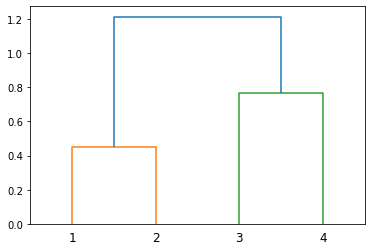

In [51]:
d = np.array([[0, 0.3, 0.4, 0.7], 
                     [0.3, 0, 0.5, 0.8],
                     [0.4, 0.5, 0.0, 0.45],
                     [0.7, 0.8, 0.45, 0.0]])
a = np.asmatrix(d)
#Z = linkage(a, method='average', metric='hamming')
Z = linkage(d, 'ward')
#fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=["1", "2", "3", "4"])
plt.show()

(b)

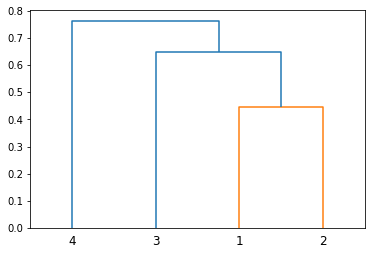

In [52]:
d = np.array([[0, 0.3, 0.4, 0.7], 
                     [0.3, 0, 0.5, 0.8],
                     [0.4, 0.5, 0.0, 0.45],
                     [0.7, 0.8, 0.45, 0.0]])
a = np.asmatrix(d)
#Z = linkage(a, method='average', metric='hamming')
Z = linkage(d, 'single')
#fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=["1", "2", "3", "4"])
plt.show()

(c)

Clusters (1,2) and (3,4).

(d)

Clusters ((1,2),3) and (4).

(e)

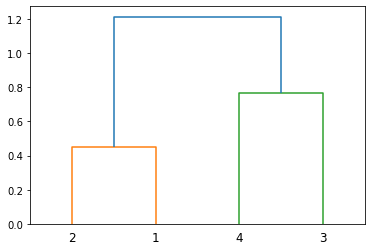

In [56]:
d = np.array([[0, 0.3, 0.4, 0.7], 
                     [0.3, 0, 0.5, 0.8],
                     [0.4, 0.5, 0.0, 0.45],
                     [0.7, 0.8, 0.45, 0.0]])
a = np.asmatrix(d)
#Z = linkage(a, method='average', metric='hamming')
Z = linkage(d, 'ward')
#fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z, labels=["2", "1", "4", "3"])
plt.show()

index: https://pandas.pydata.org/docs/reference/api/pandas.Index.isin.html 
Gridsearch: https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html 
linearSVC: https://www.programcreek.com/python/example/75183/sklearn.svm.LinearSVC
silhouette: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
hammingscore: https://stackoverflow.com/questions/32239577/getting-the-accuracy-for-multi-label-prediction-in-scikit-learn
islr q: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html